# PV Forecasting
## Multiple Linear Regression

### Import Libraries

In [99]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import seaborn as sns; sns.set(font_scale = 1.2)

In [100]:
# From

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### Data

In [108]:
# Read PV and Weather data

pw = pd.read_csv('BMS 3 Day January Weather Data CSV.csv')
print("Keys of pw: \n{}".format(pw.keys()))

Keys of pw: 
Index(['DATE (MM/DD/YYYY)', 'MST', 'Time', 'Power', 'Irradiance',
       'Temperature', 'CloudCover'],
      dtype='object')


In [109]:
pw.head()

,DATE (MM/DD/YYYY),MST,Time,Power,Irradiance,Temperature,CloudCover
0,1/1/2006,7:25,7.25,0.0,2.1386,6.130,-1
1,1/1/2006,7:26,7.26,0.0,2.2990,6.169,-1
2,1/1/2006,7:27,7.27,0.0,2.5040,6.208,-1
3,1/1/2006,7:28,7.28,0.0,2.8515,6.250,-1
4,1/1/2006,7:29,7.29,0.0,3.2169,6.289,-1


In [110]:
pw.tail()

,DATE (MM/DD/YYYY),MST,Time,Power,Irradiance,Temperature,CloudCover
1678,1/3/2006,16:42,16.42,0.2,7.6724,7.20,-1
1679,1/3/2006,16:43,16.43,0.2,7.2090,7.22,-1
1680,1/3/2006,16:44,16.44,0.1,6.4160,7.23,-1
1681,1/3/2006,16:45,16.45,0.1,5.7565,7.23,-1
1682,1/3/2006,16:46,16.46,0.0,5.1506,7.23,-1


In [111]:
# Number of rows and colums
pw.shape

(1683, 7)

In [112]:
# Statical detail of the dataset
pw.describe()

,Time,Power,Irradiance,Temperature,CloudCover
count,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000
mean,11.885300,40.546940,303.097612,9.364492,9.789661
std,2.705421,23.263016,171.154872,3.109536,18.800750
min,7.250000,0.000000,2.138600,3.472000,-1.000000
25%,9.450000,22.100000,140.330000,7.285000,1.000000
50%,12.050000,43.500000,341.000000,8.860000,3.000000
75%,14.250000,61.200000,462.235000,10.030000,8.000000
max,16.460000,75.600000,539.100000,17.190000,100.000000


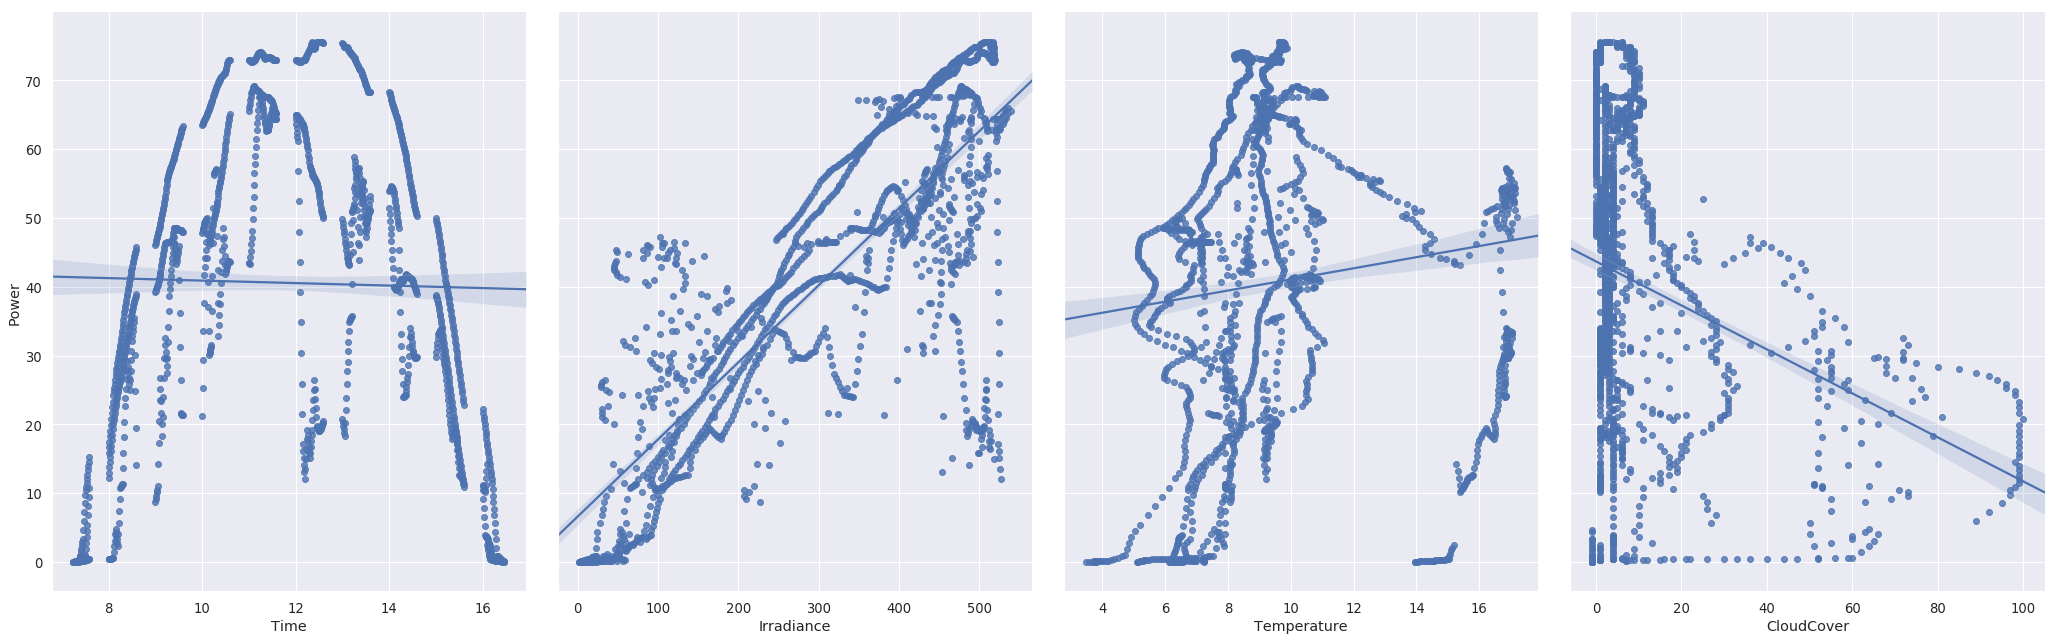

In [113]:
# Visualize the relationship between Power Generated and Weather using scatterplots
sns.pairplot(pw, x_vars=['Time','Irradiance', 'Temperature','CloudCover'], y_vars='Power', height=9, aspect=0.8, kind='reg')

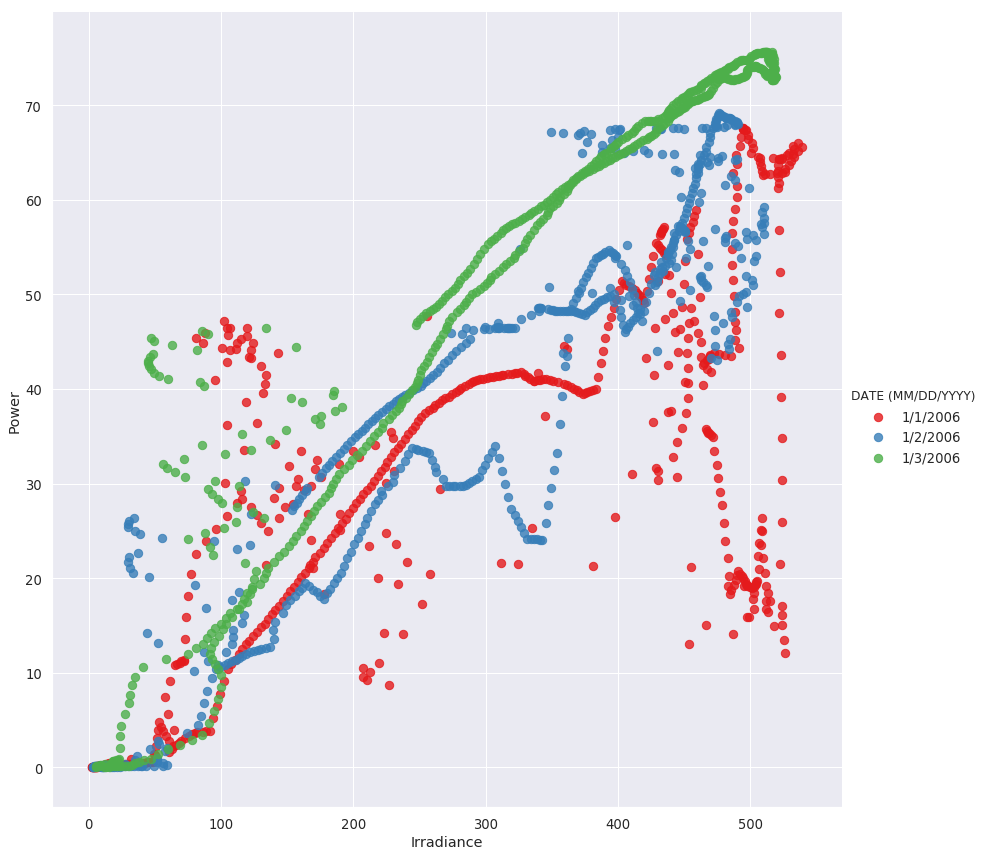

In [114]:
# Plot two parameters (Power & Irradiance)
sns.lmplot('Irradiance','Power', data=pw, hue='DATE (MM/DD/YYYY)',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70}, height=12);

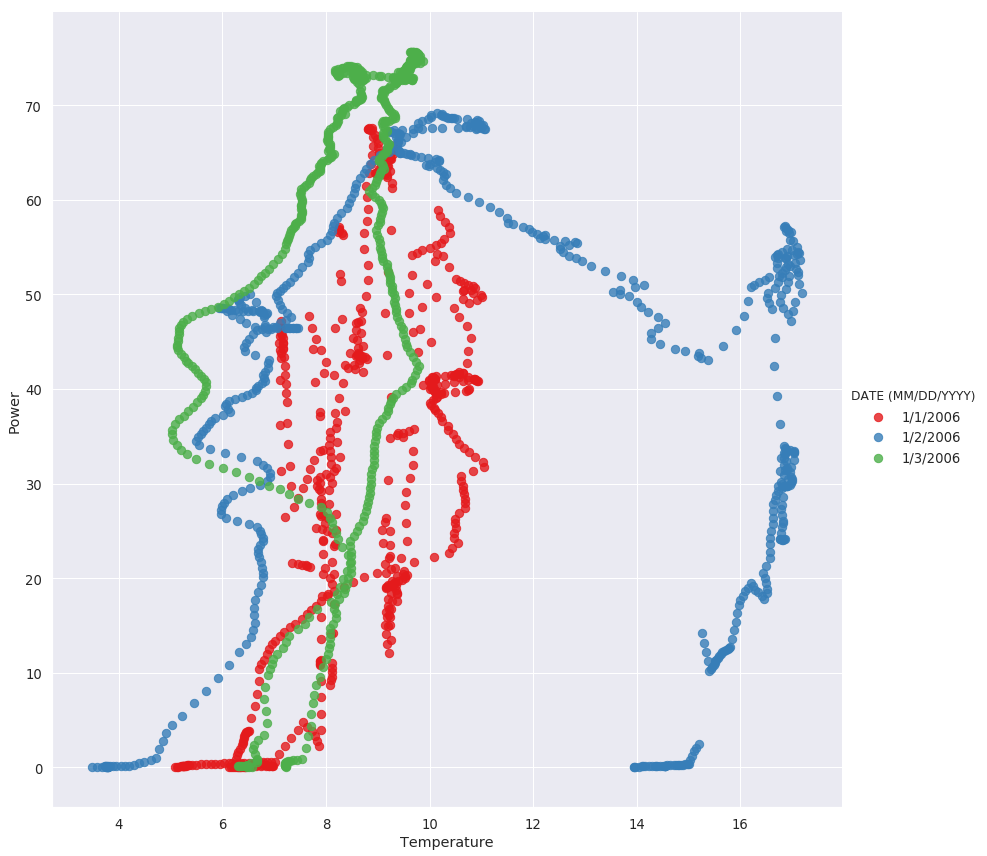

In [115]:
# Plot two parameters (Power & Temperature)
sns.lmplot('Temperature', 'Power', data=pw, hue='DATE (MM/DD/YYYY)',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70}, height=12);

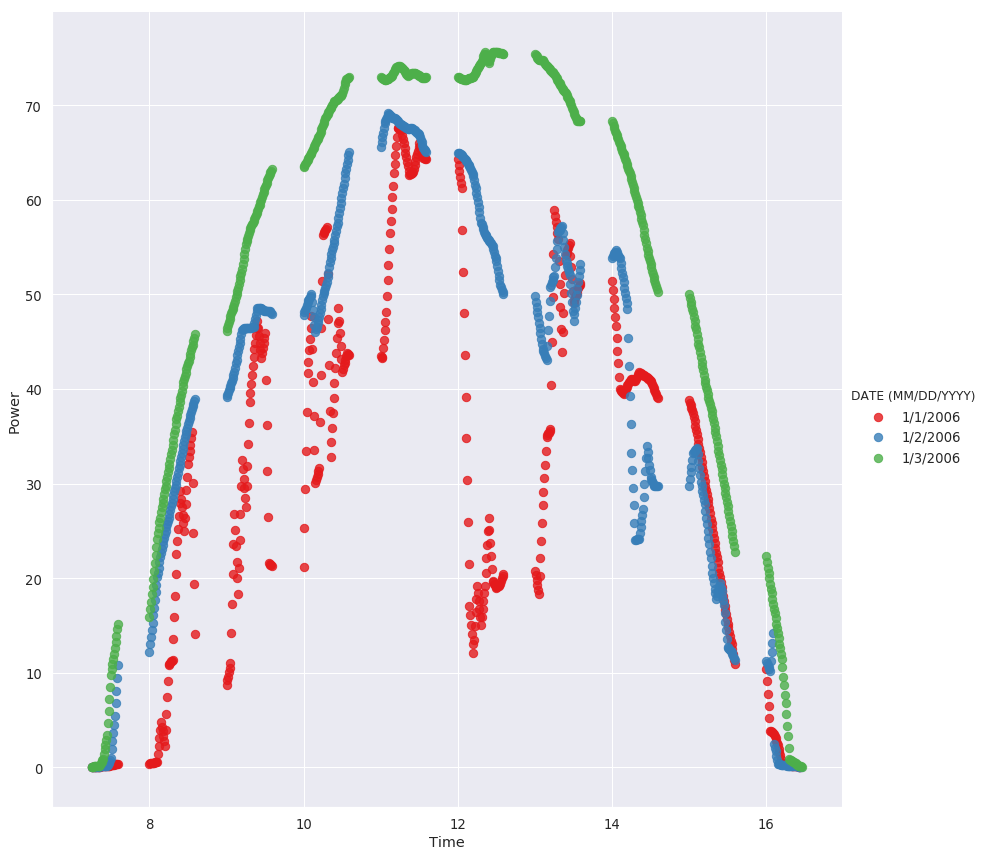

In [116]:
# Plot two parameters (Power & Time)
sns.lmplot('Time','Power', data=pw, hue='DATE (MM/DD/YYYY)',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70}, height=12);

In [117]:
# Columns that contain NaN values (True = Nan value)
pw.isnull().any()

DATE (MM/DD/YYYY)    False
MST                  False
Time                 False
Power                False
Irradiance           False
Temperature          False
CloudCover           False
dtype: bool

In [128]:
# Fill NaN existing columns
pwfill = pw.fillna(method='ffill')

## Divide Data

In [129]:
# Divide data
# X variable contains Attributes
# y variable contains Labels

X = pw[['Time','Irradiance','Temperature', 'CloudCover']].values
y = pw['Power'].values


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


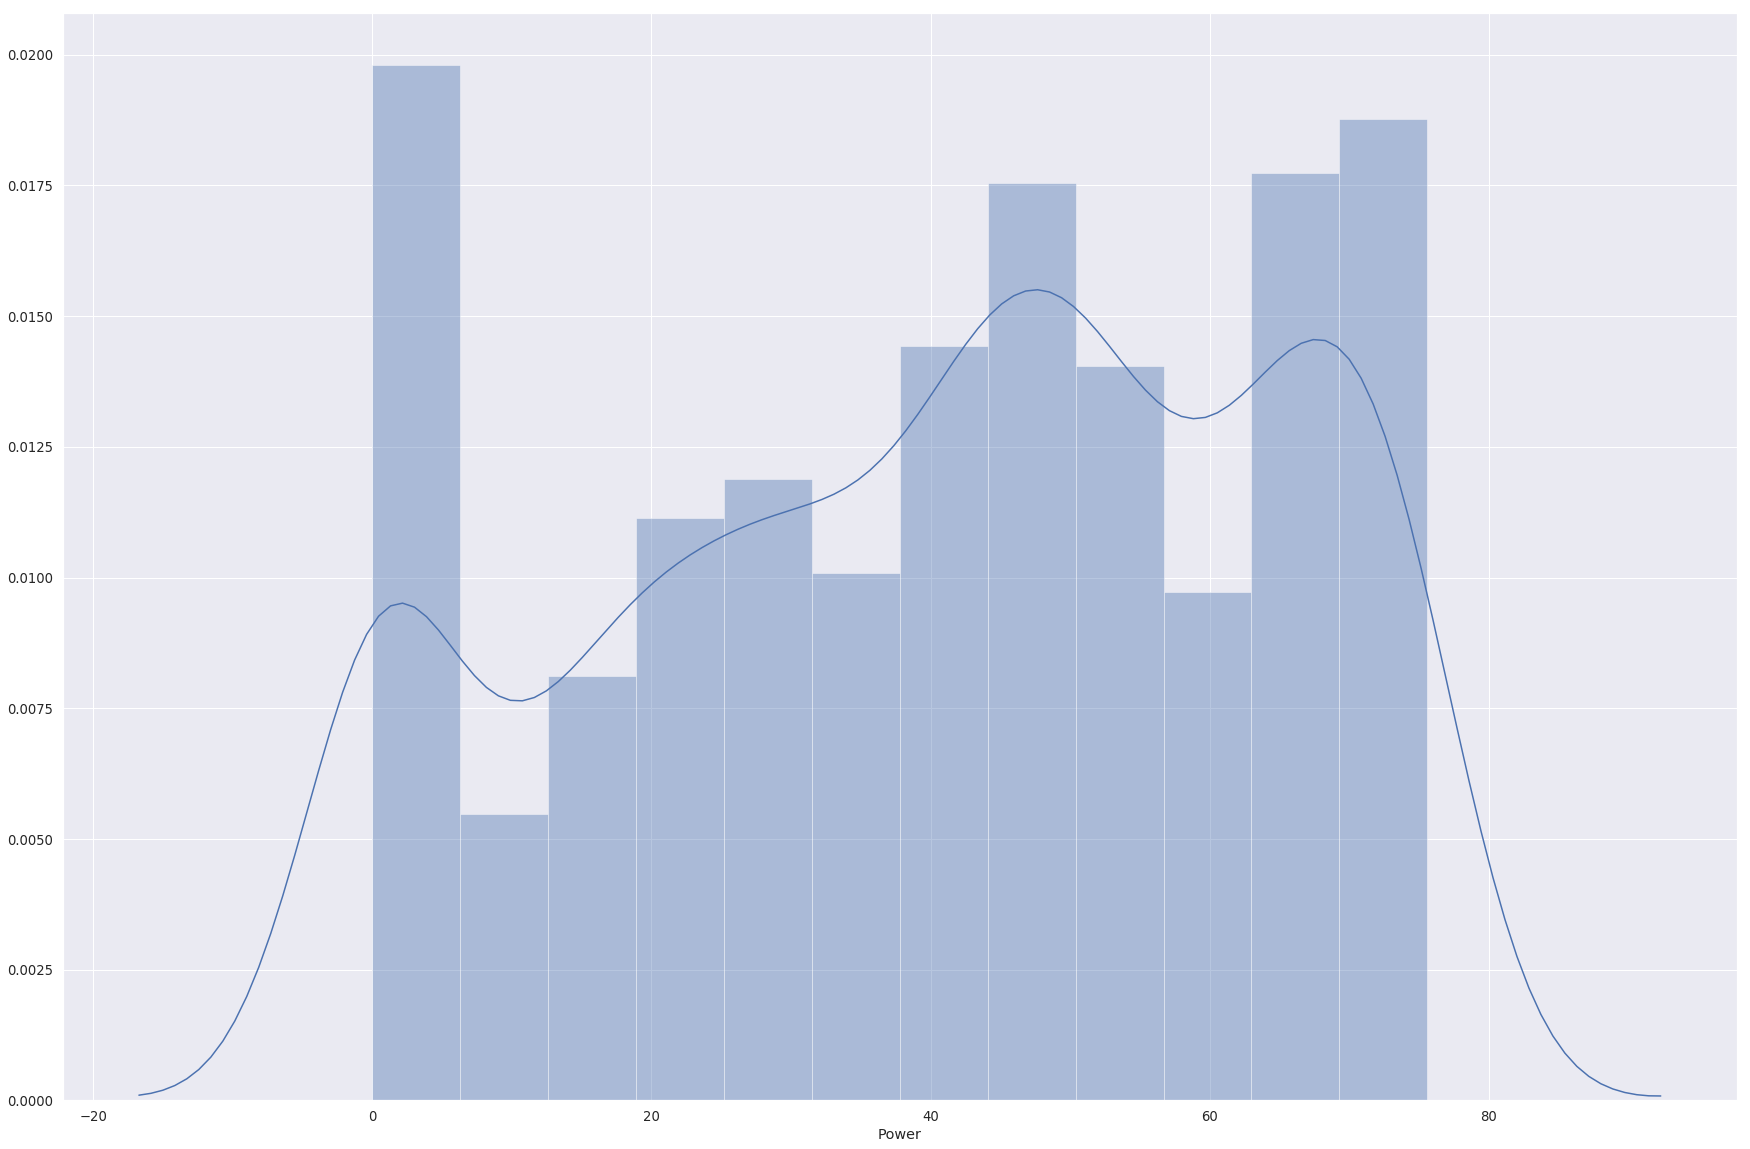

In [130]:

plt.figure(figsize=(30,20))
plt.tight_layout()
seabornInstance.distplot(pw['Power'])

## Training & Testing Data

In [122]:
# Split 90% of the data to the training set while 10% of the data to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [123]:
# Train model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [124]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.6912847291421789

In [125]:
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])  
coeff_df

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [131]:
df_coeff = pd.DataFrame(regression.coef_, X.columns, columns=['Coefficients'])
df_coeff

NameError: name 'regression' is not defined

In [132]:
# Prediction on Test Data

y_pred = regressor.predict(X_test)

In [133]:
# Difference between actual value and predicted value

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(30)

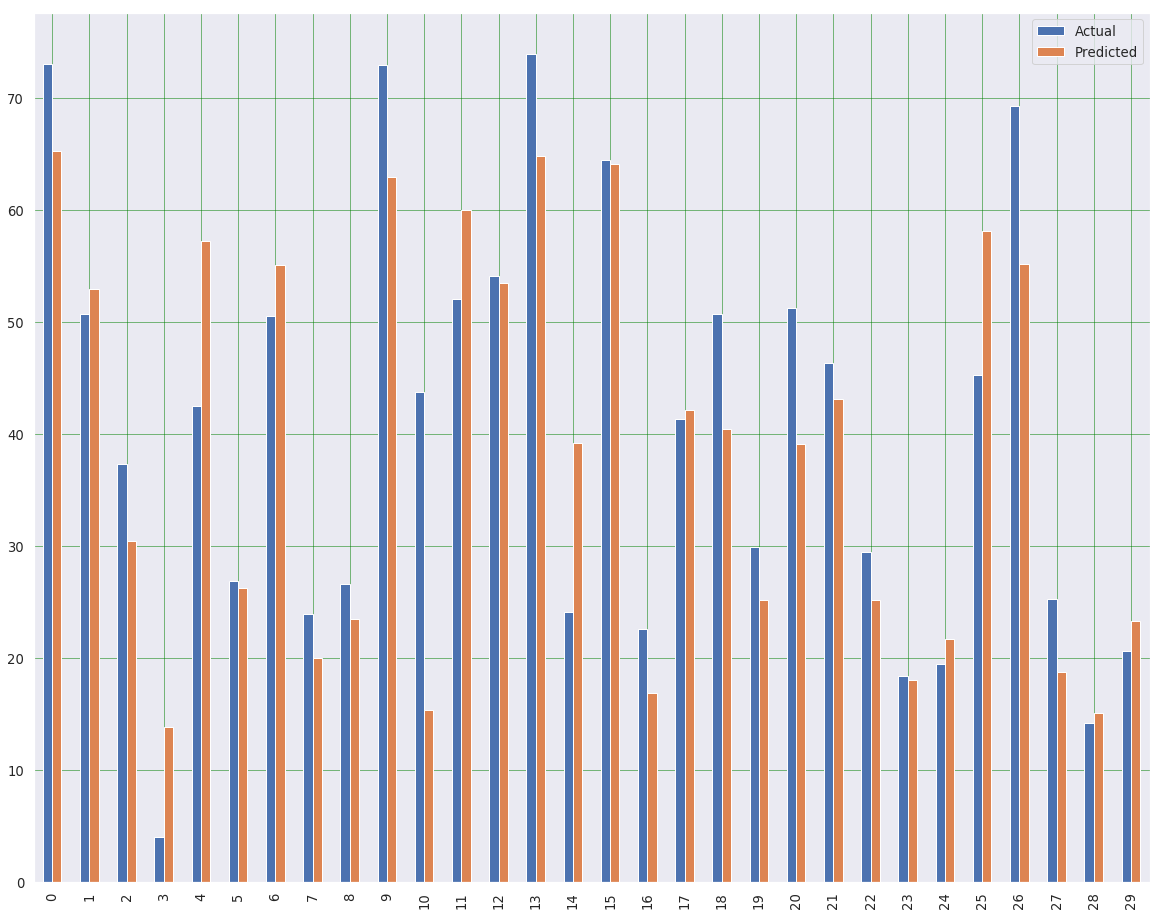

In [134]:
# Plot Actual vs Predicted Values
df1.plot(kind='bar',figsize=(20,16))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [135]:
# Find the value for MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.637050930207451
Mean Squared Error: 138.3912888719206
Root Mean Squared Error: 11.76398269600566
